In [1]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/ralbu85/DataScience_2022S/master/data/country.csv')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [2]:
columns=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
X = df[columns]

In [3]:
X = (X-X.mean())/X.std()

In [14]:
from sklearn.decomposition import PCA
pca=PCA()
Z=pca.fit_transform(X)
Z

array([[-2.90428986,  0.09533386, -0.71596521, ...,  0.38185183,
         0.41383141, -0.01410602],
       [ 0.42862224, -0.58639208, -0.33248555, ...,  0.24817249,
        -0.22037967,  0.17279609],
       [-0.28436983, -0.45380957,  1.21784212, ..., -0.08695208,
        -0.18360988,  0.08378519],
       ...,
       [ 0.49702956,  1.38657416, -0.23781089, ..., -0.1431961 ,
        -0.21693764, -0.03641279],
       [-1.88179152, -0.10912482,  1.10642399, ...,  0.06007564,
         0.08922617, -0.09576124],
       [-2.855476  ,  0.48454072,  0.22249741, ..., -0.44085872,
         0.66234607, -0.44015798]])

In [5]:

pca.explained_variance_

array([4.13565658, 1.54634631, 1.1703833 , 0.99478456, 0.66061903,
       0.22358112, 0.11343874, 0.08831536, 0.06687501])

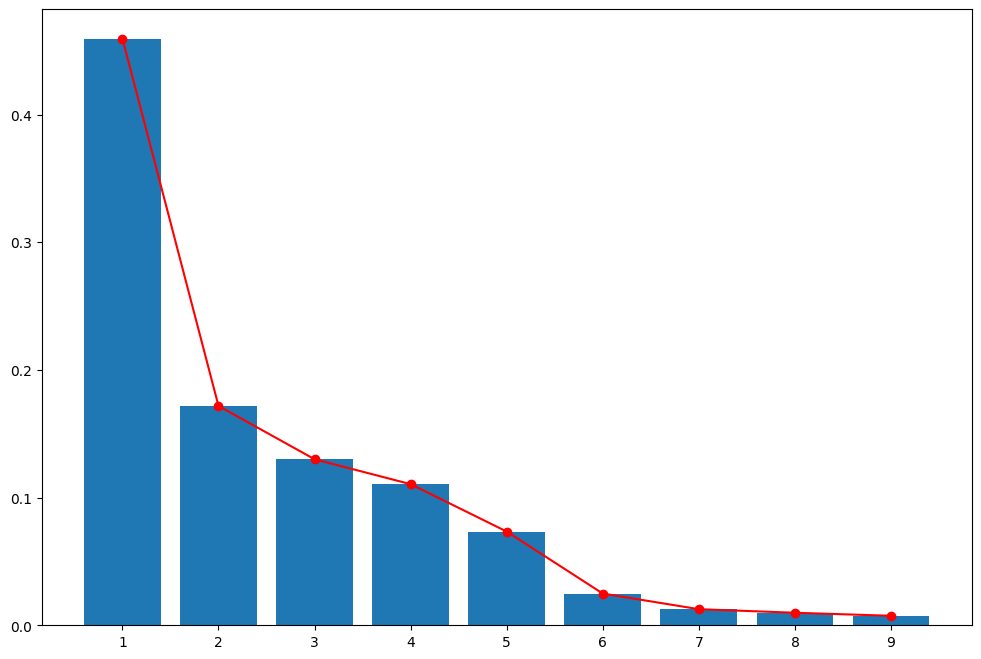

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.bar(columns, pca.explained_variance_ratio_,tick_label=range(1,10))
plt.plot(pca.explained_variance_ratio_, 'or-')

In [7]:

import numpy as np
np.cumsum(pca.explained_variance_ratio_)

array([0.4595174 , 0.63133365, 0.76137624, 0.87190786, 0.94530998,
       0.97015232, 0.98275663, 0.99256944, 1.        ])

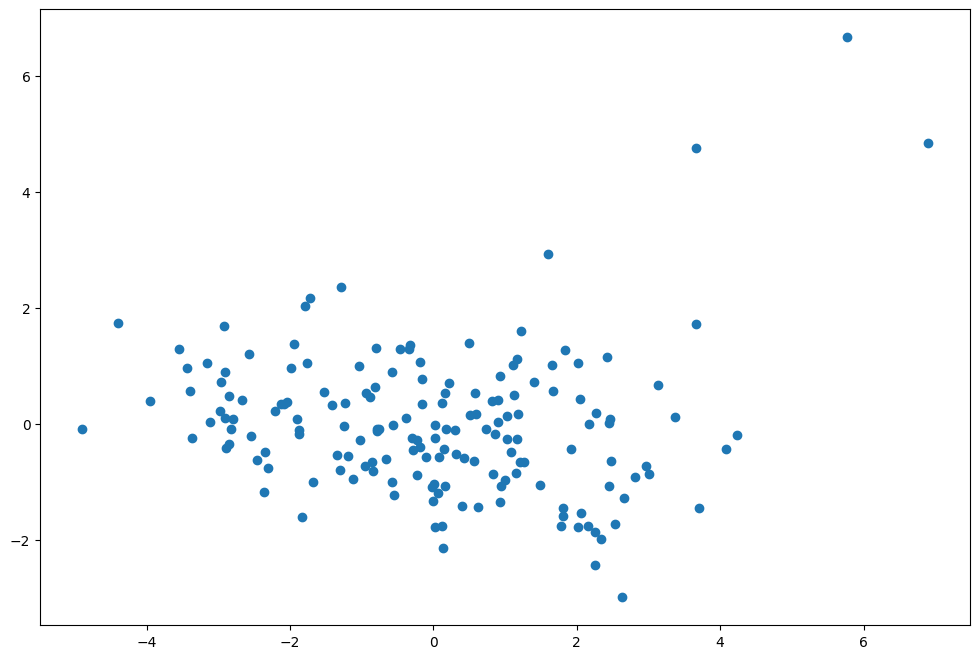

In [8]:
import matplotlib.pyplot as plt
z1 = Z[:,0]
z2 = Z[:,1]
plt.figure(figsize=(12,8))
plt.scatter(z1,z2)

In [9]:
pca.components_.shape

(9, 9)

In [10]:
factor1=pca.components_[0,:]
factor2=pca.components_[1,:]

In [11]:
factor1

array([-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
       -0.19317293,  0.42583938, -0.40372896,  0.39264482])

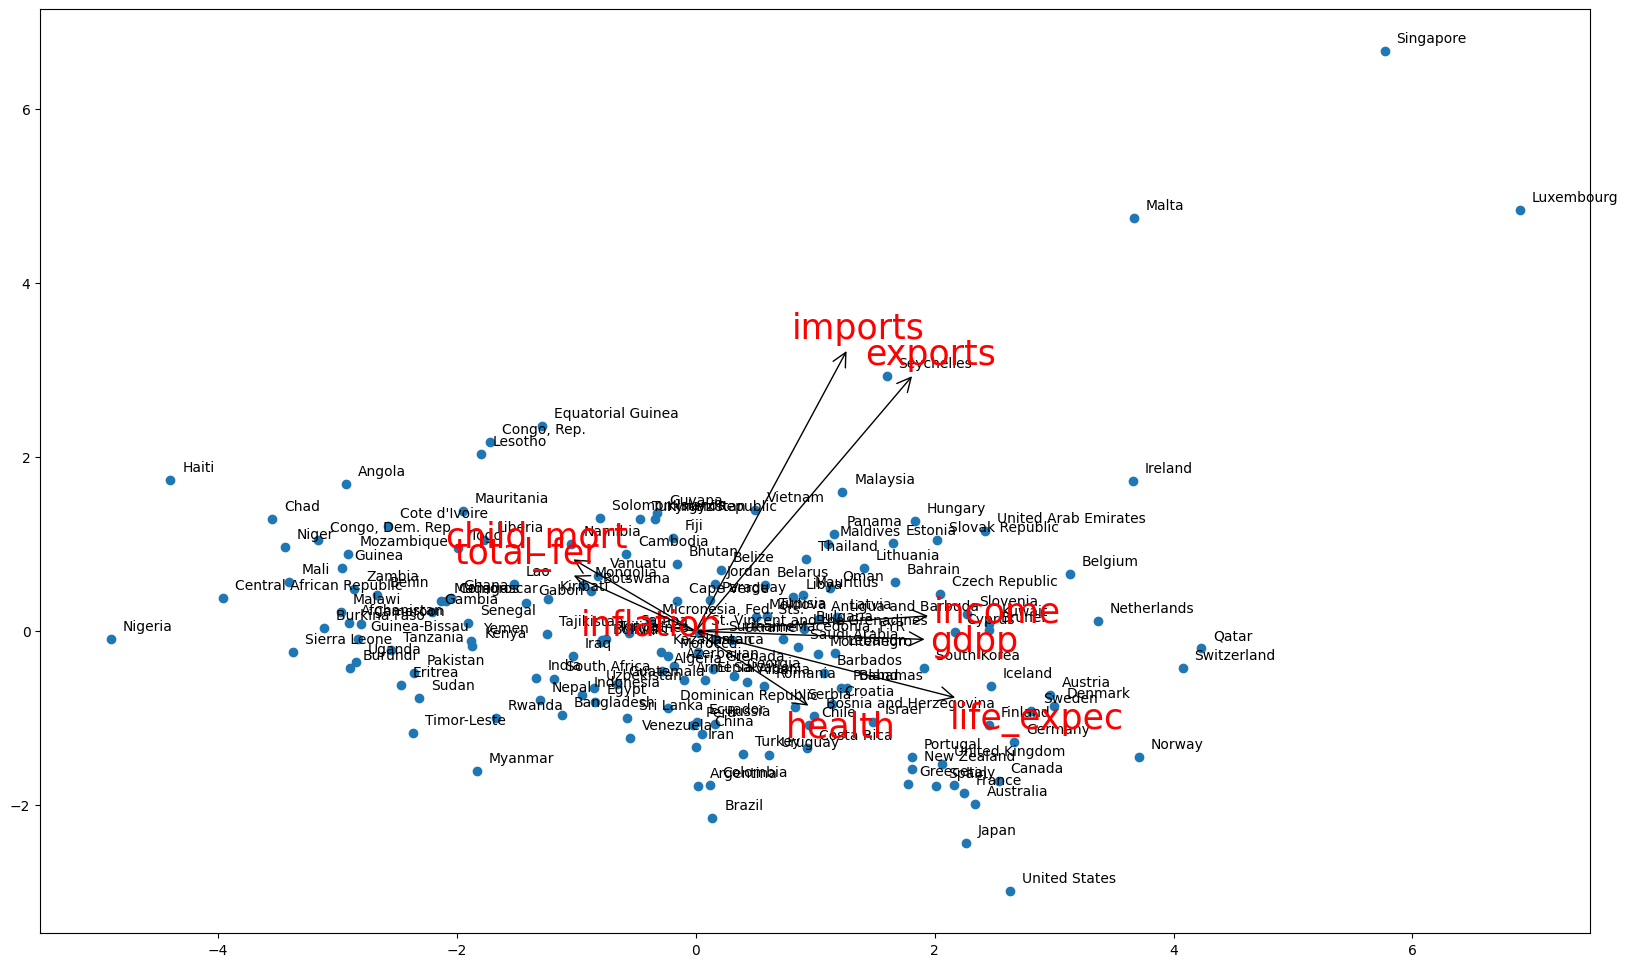

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
plt.scatter(z1, z2)

nations = np.array(df['country'])

for i in range(len(Z)):
    plt.annotate(nations[i], (z1[i]+0.1, z2[i]+0.1))

for i in range(len(columns)):
    plt.annotate(columns[i],
                 xy=(0,0),
                 xytext=(factor1[i]*5,factor2[i]*5),
                 arrowprops={'lw':1,'arrowstyle':'<-'},
                fontsize=25,color='r')